In [77]:
# From textbook I found: Handbook of Robust Low-Rank and Sparse Matrix Decomposition: Applications in Image and Video Processing
# https://www-taylorfrancis-com.ezproxy.cul.columbia.edu/books/mono/10.1201/b20190/handbook-robust-low-rank-sparse-matrix-decomposition-thierry-bouwmans-necdet-serhat-aybat-el-hadi-zahzah
import numpy as np
from scipy.fftpack import dct
from skimage.io import imread, imshow
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt

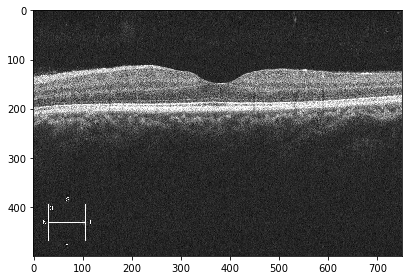

In [78]:
X = imread("NORMAL1.jpeg")
#Taking the first of the 3 channels, as they are all the same.
X = X[:,:,0]
h, w = X.shape
imshow(X)

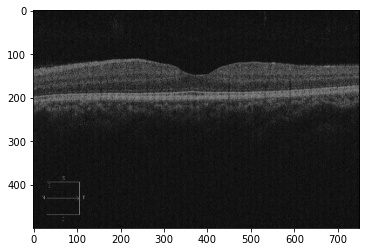

In [79]:
compression_factor = 2
mask = np.zeros((h,w))
mask[:,np.arange(0, w, compression_factor)] = 1
# mask = np.random.randint(2, size=(h,w))
A = X*mask
plt.imshow(X*mask, cmap="gray")

In [80]:
def SoftThresh(x, tau):
    # numpy automatically applies functions to each element of the array
    return np.sign(x)*np.maximum(0, np.abs(x) - tau)

def ShrinkageOperator(X, tau):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    S = np.diag(SoftThresh(S,tau))
    return U @ S @ Vt

def Proj(X, mask):
    return X*mask

def UUpdate(P, Vt):
    q, r = np.linalg.qr(P @ Vt.T)
    return q

def VtUpdate(P, U, lmda, a):
    Z = ShrinkageOperator(P.T @ U, lmda/a)
    return Z.T

def SUpdate(mask, A, U, Vt, Y, a):
    Z = A - U @ Vt + Y/a
    S = SoftThresh(Proj(Z, mask), 1/a)
    Sc = Proj(Z, mask == 0)
    return S + Sc

def YUpdate(A, U, Vt, S, Y, a):
    return Y + a*(A - U @ Vt - S)

def aUpdate(a, ro, a_max):
    return np.minimum(a*ro, a_max)





In [81]:
d = 325
err = 1
lmda = 1
U = np.eye(h,d)
Vt = np.zeros((d,w))
Y = np.zeros_like(A)
S = A
a = 1/np.linalg.norm(A)
print(a)
P = A - S + Y/a
a_max = 10^10
ro = 1.1

2.9894832704690373e-05


In [82]:
iters = 3

for i in range(iters):
    U = UUpdate(P, Vt)
    Vt = VtUpdate(P, U, lmda, a)
    S = SUpdate(mask, A, U, Vt, Y, a)
    Y = YUpdate(A, U, Vt, S, Y, a)
    a = aUpdate(a, ro, a_max)
    print(np.linalg.norm(A - U @ Vt - S))
    print(np.linalg.norm(U), np.linalg.norm(Vt), np.linalg.norm(S), np.linalg.norm(Y))


33450.59696029355
18.027756377319946 0.0 0.0 0.9999999999999996


C:\Users\Zvi\AppData\Local\Temp/ipykernel_4488/709075563.py:18: RuntimeWarning: divide by zero encountered in double_scalars
  Z = ShrinkageOperator(P.T @ U, lmda/a)
C:\Users\Zvi\AppData\Local\Temp/ipykernel_4488/709075563.py:22: RuntimeWarning: divide by zero encountered in true_divide
  Z = A - U @ Vt + Y/a
C:\Users\Zvi\AppData\Local\Temp/ipykernel_4488/709075563.py:22: RuntimeWarning: invalid value encountered in true_divide
  Z = A - U @ Vt + Y/a
C:\Users\Zvi\AppData\Local\Temp/ipykernel_4488/709075563.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  S = SoftThresh(Proj(Z, mask), 1/a)
C:\Users\Zvi\AppData\Local\Temp/ipykernel_4488/709075563.py:3: RuntimeWarning: invalid value encountered in subtract
  return np.sign(x)*np.maximum(0, np.abs(x) - tau)
C:\Users\Zvi\AppData\Local\Temp/ipykernel_4488/709075563.py:11: RuntimeWarning: invalid value encountered in multiply
  return X*mask


nan
18.027756377319946 0.0 nan nan
nan
18.027756377319946 0.0 nan nan
